# Introduction to Machine learning 

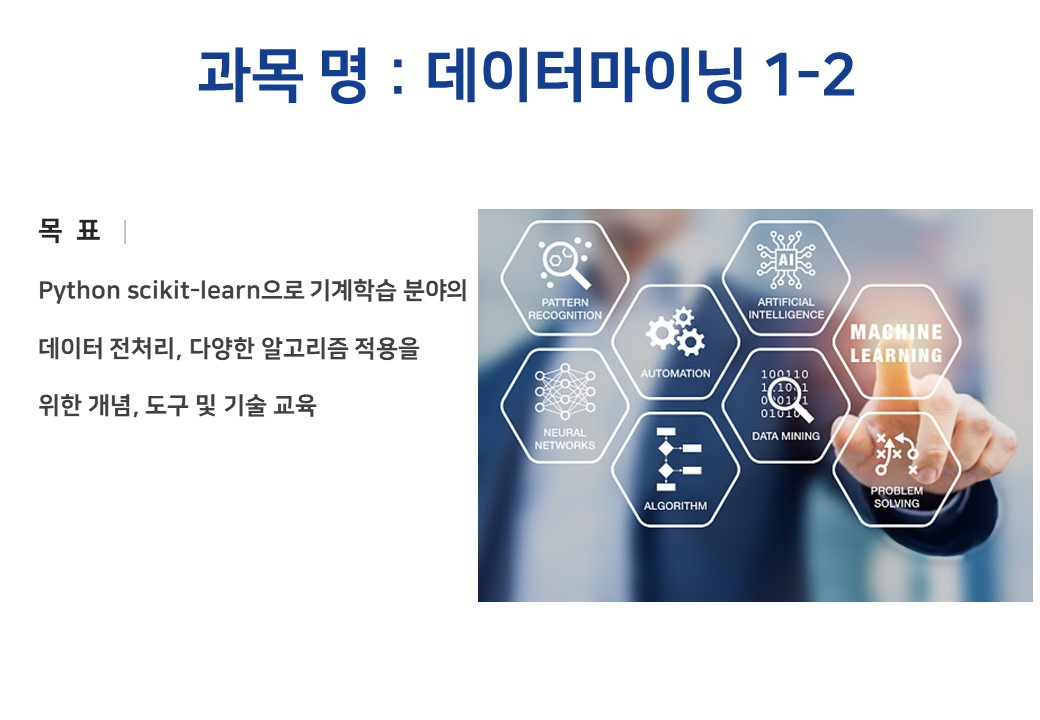

In [94]:
from IPython.display import Image
width=800; height=600
dir_path = r'D:\ASSIST\img'
Image(filename= dir_path + '/슬라이드2.jpg', width=width, height=height)

In [154]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns; sns.set() # 시각화 seaborn
get_ipython().run_line_magic('matplotlib', 'inline') # 시각화 그림 자동 화면 출력
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결

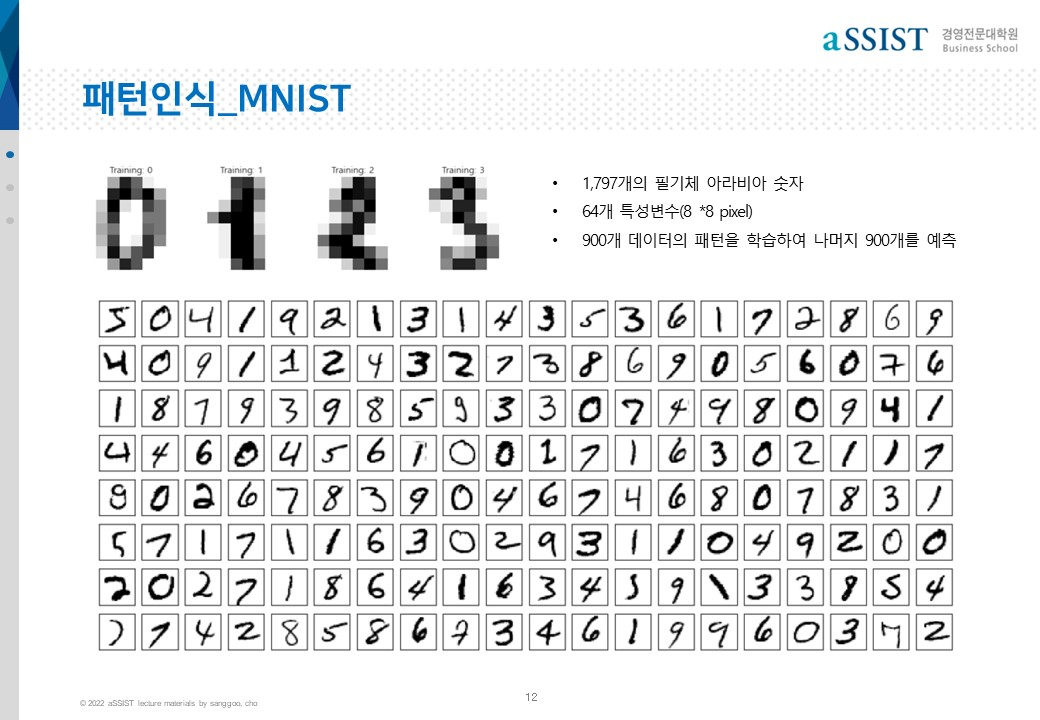

In [155]:
Image(filename= dir_path + '/슬라이드12.jpg', width=width, height=height)

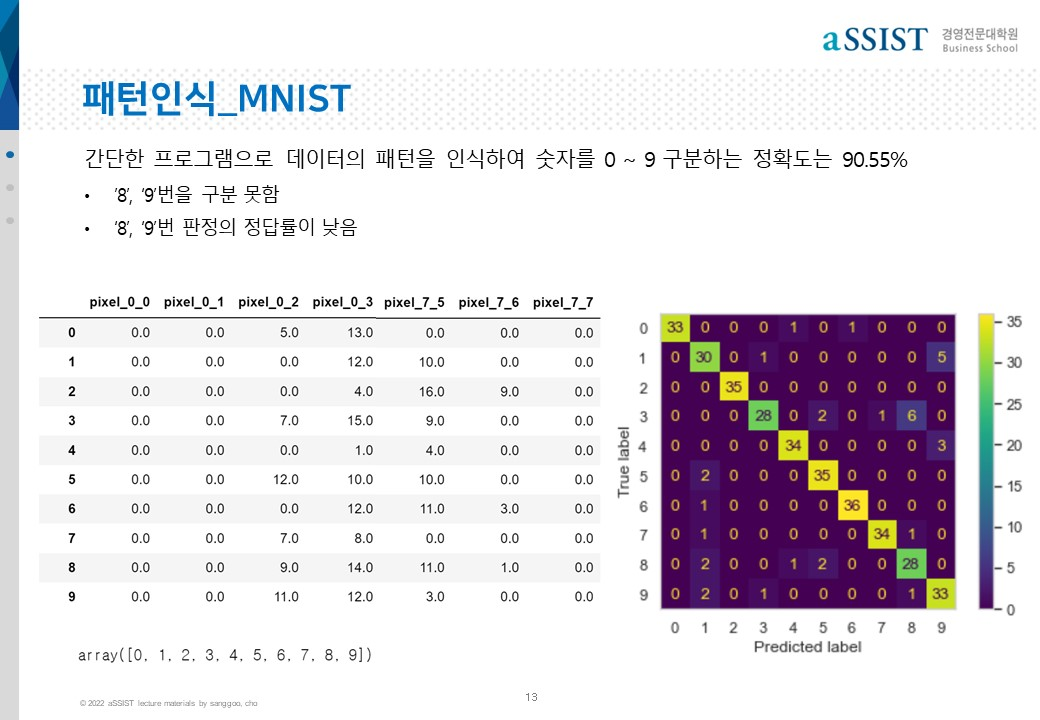

In [156]:
Image(filename= dir_path + '/슬라이드13.jpg', width=width, height=height)

# Recognizing hand-written digits

In [157]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [158]:
digits = datasets.load_digits()
data = digits.images.reshape((len(digits.images), -1))
digits = datasets.load_digits()
digits.keys()

pd.DataFrame(digits.data, columns=[digits.feature_names]).head()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [159]:
digits.target[0:15]
len(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

1797

Text(0.5, 1.0, 'Training: 0')

Text(0.5, 1.0, 'Training: 1')

Text(0.5, 1.0, 'Training: 2')

Text(0.5, 1.0, 'Training: 3')

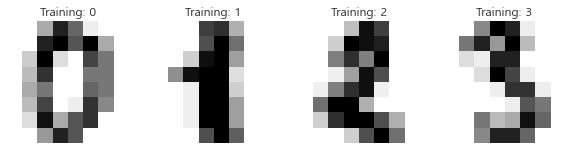

In [160]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## cross validation

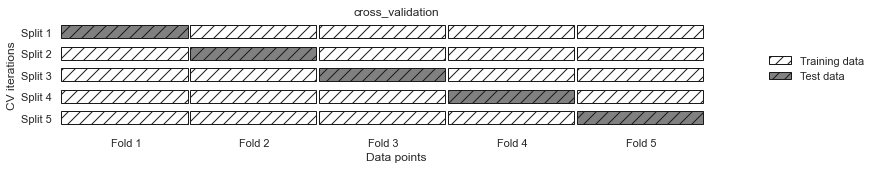

In [189]:
import mglearn
mglearn.plots.plot_cross_validation()

In [161]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

### SVM

In [162]:
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
accuracy_score(y_test, predicted)

SVC(gamma=0.001)

0.9583333333333334

### Logistic regression

In [163]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
accuracy_score(y_test, predicted)

LogisticRegression()

0.9055555555555556

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        35
           1      1.000     1.000     1.000        36
           2      1.000     1.000     1.000        35
           3      1.000     1.000     1.000        37
           4      1.000     1.000     1.000        37
           5      1.000     1.000     1.000        37
           6      1.000     1.000     1.000        37
           7      1.000     1.000     1.000        36
           8      1.000     1.000     1.000        33
           9      1.000     1.000     1.000        37

    accuracy                          1.000       360
   macro avg      1.000     1.000     1.000       360
weighted avg      1.000     1.000     1.000       360



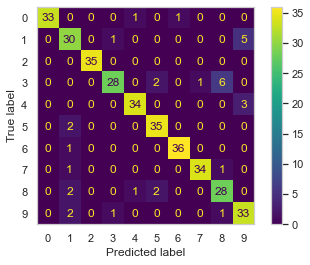

In [164]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, average_precision_score
sns.set_style("whitegrid", {'axes.grid' : False})
print(classification_report(y_test, y_test, digits=3))
plot_confusion_matrix(clf, X_test, y_test)

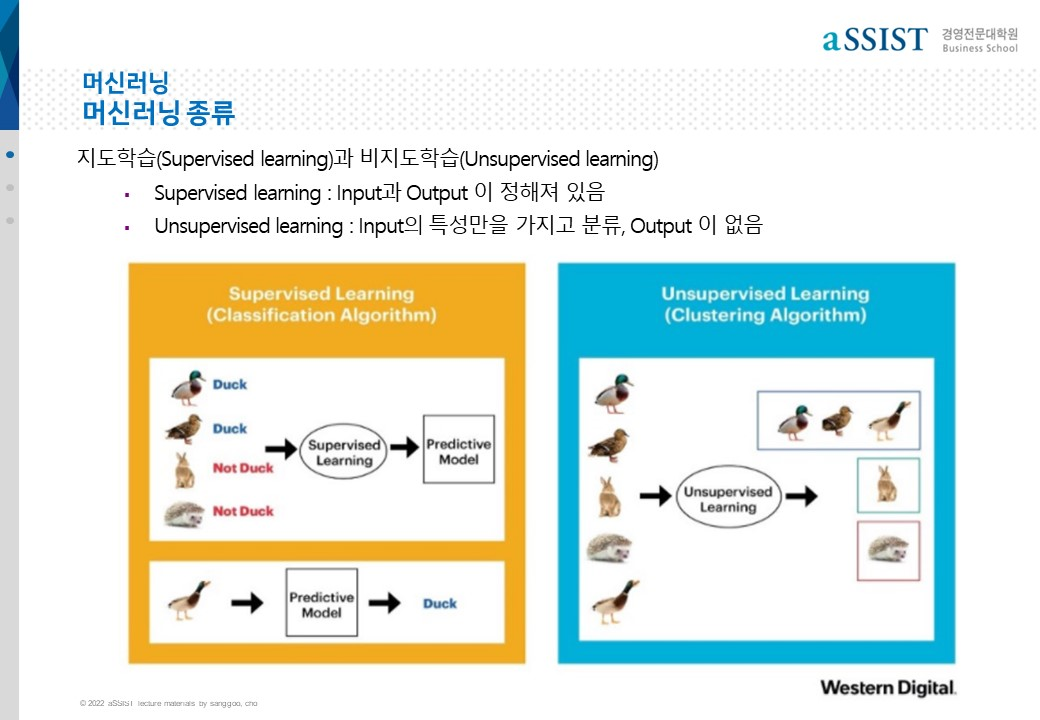

In [165]:
Image(filename= dir_path + '/슬라이드15.jpg', width=width, height=height)

In [166]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [167]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Figure size 648x252 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

Text(0.5, 1.0, 'supervised learning')

<AxesSubplot:>

Text(0.5, 0, 'Petal length')

Text(0.5, 1.0, 'unsupervised learning')

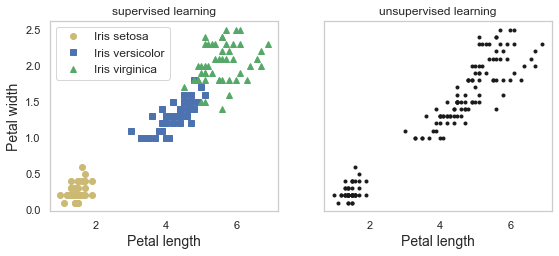

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title('supervised learning')

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.title('unsupervised learning')

plt.show()

# Supervised learning

In [169]:
from sklearn.linear_model import LogisticRegression
supervised = LogisticRegression()
supervised.fit(X, y)
y_pred = supervised.predict(X)
y_pred

LogisticRegression()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<Figure size 648x252 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

Text(0.5, 1.0, 'supervised learning')

<AxesSubplot:>

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

Text(0.5, 1.0, 'y_pred: unsupervised learning')

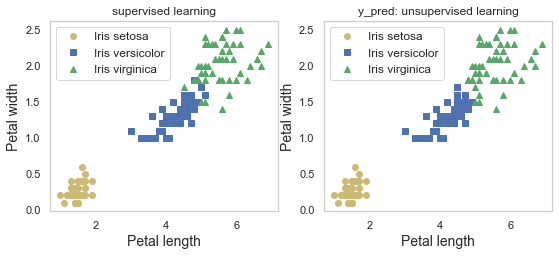

In [170]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title('supervised learning')

plt.subplot(122)
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Iris setosa")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title('y_pred: unsupervised learning')

plt.show()

In [171]:
print(f'지도학습 모델의 정확도(accuracy)는 {np.sum(y_pred == y)/len(y)*100} %')

지도학습 모델의 정확도(accuracy)는 97.33333333333334 %


In [172]:
y_probas = supervised.predict_proba(X)
y_probas[:10]
y_probas[:10].sum(1)

array([[9.81805357e-01, 1.81946291e-02, 1.43635389e-08],
       [9.71734360e-01, 2.82656104e-02, 3.00459110e-08],
       [9.85454820e-01, 1.45451673e-02, 1.22741913e-08],
       [9.76303016e-01, 2.36969440e-02, 3.95628149e-08],
       [9.85391123e-01, 1.46088651e-02, 1.18914364e-08],
       [9.70473999e-01, 2.95259282e-02, 7.32073902e-08],
       [9.86893939e-01, 1.31060410e-02, 1.98944296e-08],
       [9.76407907e-01, 2.35920650e-02, 2.75139440e-08],
       [9.79849996e-01, 2.01499733e-02, 3.05668381e-08],
       [9.69141891e-01, 3.08580780e-02, 3.15207622e-08]])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Unsupervised learning

In [173]:
from sklearn.mixture import GaussianMixture
unsupervised = GaussianMixture(n_components=3, random_state=42)
unsupervised.fit(X)
y_pred = unsupervised.predict(X)
y_pred
y

GaussianMixture(n_components=3, random_state=42)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [174]:
mapping = np.array([1,2,0])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

<Figure size 648x252 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

Text(0.5, 1.0, 'supervised learning')

<AxesSubplot:>

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

Text(0.5, 1.0, 'y_pred: unsupervised learning')

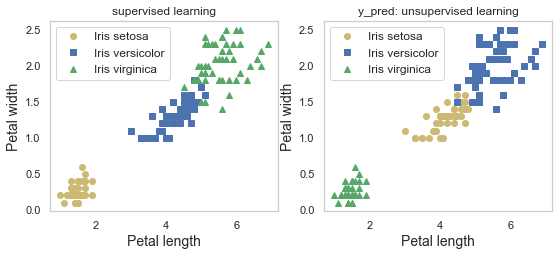

In [175]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title('supervised learning')

plt.subplot(122)
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Iris setosa")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title('y_pred: unsupervised learning')

plt.show()

In [176]:
print(f'비지도학습 모델의 정확도(accuracy)는 {np.sum(y_pred == y)/len(y)*100} %')

비지도학습 모델의 정확도(accuracy)는 3.3333333333333335 %


# Data, Algorithm, model
## model = algoritm(data)

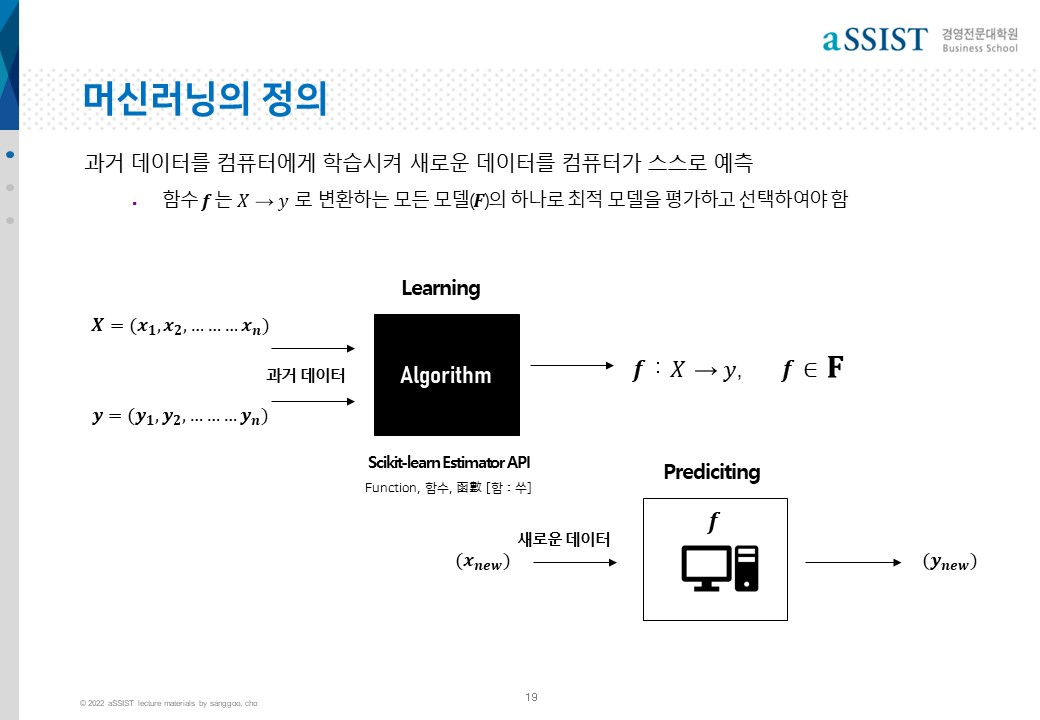

In [177]:
Image(filename= dir_path + '/슬라이드19.jpg', width=width, height=height)

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions # 2차원 특성변수의 분류경계선을 시각

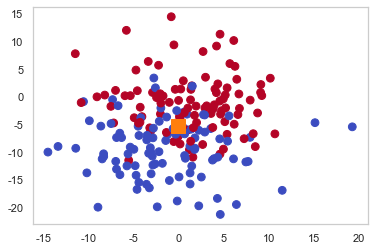

In [179]:
from sklearn.datasets import make_blobs
X, y = make_blobs(200, 2, centers=2, random_state=2, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='coolwarm')
plt.scatter(X[:, 0].mean(), X[:, 1].mean(), color = '#ff7f0e', s=200, marker='s')

In [180]:
Xmean = np.array([X[:, 0].mean(), X[:, 1].mean()])
Xnew = Xmean[np.newaxis, :]

In [181]:
np.random.seed(1357) 

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [183]:
MLA = [KNeighborsClassifier(), GaussianNB(),  LogisticRegression(), 
       DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier()]

In [184]:
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
def plot_model(X, y, clf) :
    print('*'*50); print(clf)
    clf.fit(X, y)
    accuracy = cross_val_score(clf, X, y, scoring = 'accuracy').mean()*100
    y_predict = clf.fit(X, y).predict(Xnew)
    y_proba_buy = clf.fit(X, y).predict_proba(Xnew)[:,1]
    print('정확도 {0:.2f}%'.format(accuracy))
    print('예측분류값:', y_predict)
    print('예측확률:', y_proba_buy)
    plt.figure(figsize=(12,5))
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(clf)

**************************************************
KNeighborsClassifier()
정확도 76.00%
예측분류값: [1]
예측확률: [0.6]
**************************************************
GaussianNB()
정확도 77.00%
예측분류값: [1]
예측확률: [0.53065434]
**************************************************
LogisticRegression()
정확도 80.00%
예측분류값: [0]
예측확률: [0.49951034]
**************************************************
DecisionTreeClassifier()
정확도 72.50%
예측분류값: [1]
예측확률: [1.]
**************************************************
RandomForestClassifier()
정확도 76.50%
예측분류값: [1]
예측확률: [0.62]
**************************************************
AdaBoostClassifier()
정확도 72.00%
예측분류값: [1]
예측확률: [0.50831257]


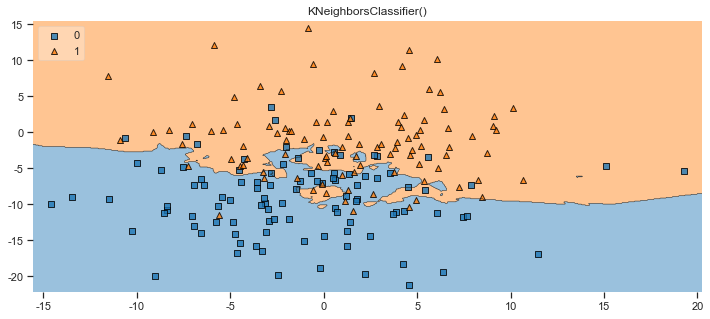

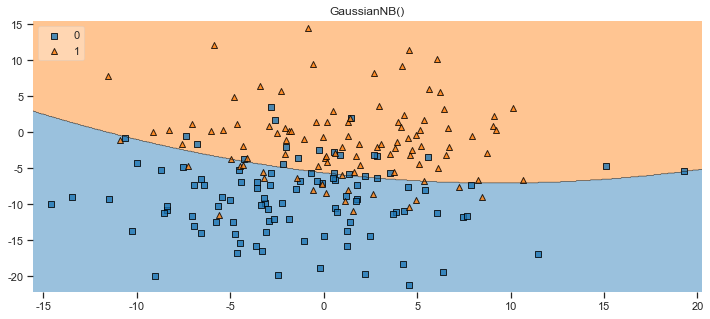

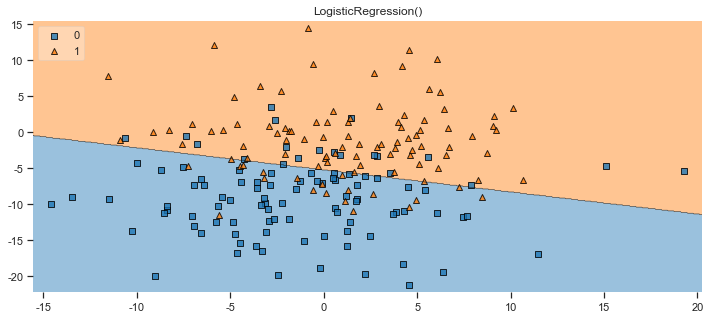

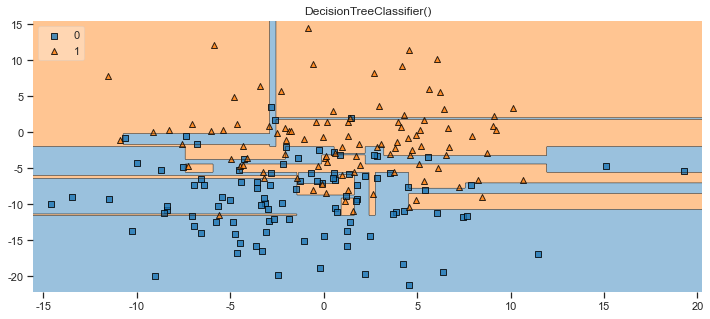

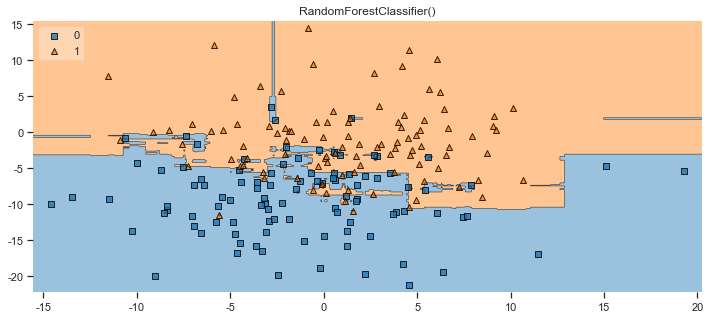

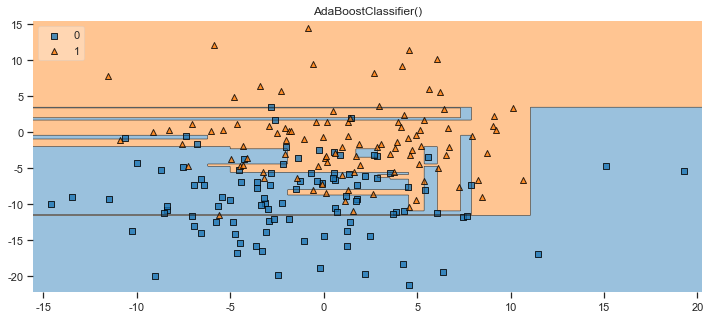

In [185]:
for clf in MLA :
    plot_model(X, y, clf)

# Bias & Variance

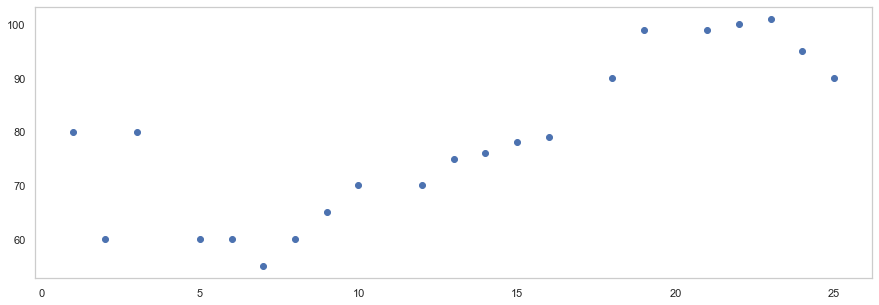

In [186]:
plt.rcParams["figure.figsize"] = (15,5)
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22,23,24,25]
y = [80,60,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100,101,95,90]

plt.scatter(x, y)
plt.show()

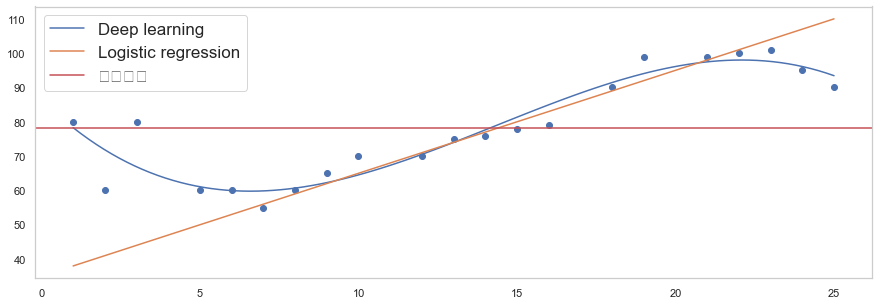

In [187]:
myline = np.linspace(1, 25, 100)
polymodel = np.poly1d(np.polyfit(x, y, 3))
regy = 35 + myline*3
plt.scatter(x, y)
plt.plot(myline, polymodel(myline), label = 'Deep learning')
plt.plot(myline, regy, label = 'Logistic regression')
plt.axhline(y = np.mean(y), label = '평균예측', color = 'r', linestyle = '-')
#plt.axhline(y = np.mean(y), label = '평균예측')
plt.legend(fontsize='17')
plt.show()

# 데이터에 적합한 알고리즘이 있음
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

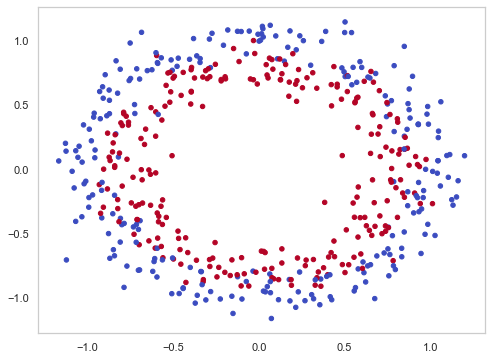

In [128]:
plt.rcParams["figure.figsize"] = (8,6)
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');plt.show()

<Figure size 576x576 with 0 Axes>

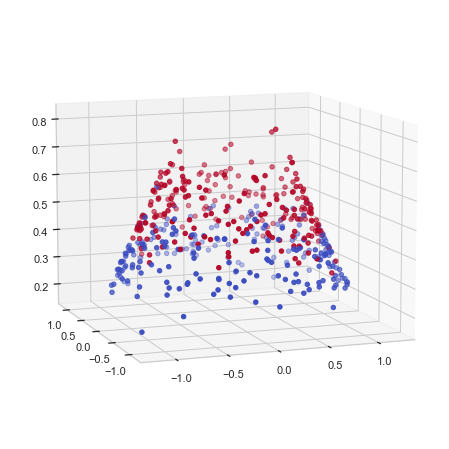

In [129]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

# End